In [37]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, top_k_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import joblib

In [39]:
df_dogs = pd.read_csv("dogs_cleaned_wybrane_cechy_rasy.csv")
df_people = pd.read_excel("survey_wersja_ostateczna.xlsx")

In [40]:
df_dogs.shape

(26, 12)

In [41]:
df_people.shape

(1597, 11)

In [42]:
df_dogs.head()

,Breed Name,Detailed Description Link,Dog Size,"Avg. Life Span, years",Tolerates Being Alone,Kid-Friendly,Dog Friendly,Friendly Toward Strangers,Health And Grooming Needs,Size,Easy To Train,Energy Level
0,Australian Shepherd,https://dogtime.com/dog-breeds/australian-shep...,Very Large,14,2,4,5,3,2.2,3,5,5
1,Beagle,https://dogtime.com/dog-breeds/beagle,Medium,12,1,5,5,5,2.8,2,1,4
2,Bernese Mountain Dog,https://dogtime.com/dog-breeds/bernese-mountai...,Very Large,8,1,5,3,5,3.4,5,4,4
3,Border Collie,https://dogtime.com/dog-breeds/border-collie,Large,14,1,4,3,5,2.4,3,5,5
4,Boston Terrier,https://dogtime.com/dog-breeds/boston-terrier,Medium,14,3,5,5,4,3.0,2,4,4


In [43]:
df_people.head()

,Activity_Level,Has_Children,Has_Other_Dog,Daily_Time_Hours,Time_Away_Frequency,Wants_Training,Living_Situation,Lifespan_Important,Stranger_Friendliness,Preferred_Size,Recommended_Breed
0,Moderate,No,No,1-3,Moderate,Yes,House with Yard,Yes,Moderate,Medium,Labrador Retriever
1,High,Yes,No,1-3,Low,Yes,House with Yard,Yes,High,Large,Border Collie
2,Low,No,Yes,Less than 1,High,No,Apartment,Yes,Low,Small,French Bulldog
3,Moderate,Yes,No,1-3,Moderate,Yes,Apartment,Yes,Moderate,Small,Cocker Spaniel
4,Low,No,No,1-3,Low,No,Apartment,No,Moderate,Very Small,English Bulldog


In [44]:
df_dogs.describe()

,"Avg. Life Span, years",Tolerates Being Alone,Kid-Friendly,Dog Friendly,Friendly Toward Strangers,Health And Grooming Needs,Size,Easy To Train,Energy Level
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,12.346154,1.576923,4.346154,3.807692,3.807692,2.976923,2.692308,3.961538,4.115385
std,2.018758,0.808608,0.935620,1.166850,1.233507,0.607492,1.319674,1.076319,0.951921
min,8.000000,1.000000,2.000000,2.000000,1.000000,1.800000,1.000000,1.000000,2.000000
25%,11.250000,1.000000,4.000000,3.000000,3.000000,2.600000,2.000000,4.000000,3.000000
50%,13.000000,1.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000
75%,14.000000,2.000000,5.000000,5.000000,5.000000,3.400000,3.750000,5.000000,5.000000
max,14.000000,3.000000,5.000000,5.000000,5.000000,4.200000,5.000000,5.000000,5.000000


In [45]:
df_people.describe()

,Activity_Level,Has_Children,Has_Other_Dog,Daily_Time_Hours,Time_Away_Frequency,Wants_Training,Living_Situation,Lifespan_Important,Stranger_Friendliness,Preferred_Size,Recommended_Breed
count,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597
unique,3,2,2,5,3,2,4,2,3,4,28
top,High,No,No,1-3,Moderate,Yes,Apartment,Yes,Moderate,Large,Cocker Spaniel
freq,542,894,1100,953,789,1125,738,1254,697,624,104


In [46]:
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Breed Name                 26 non-null     object 
 1   Detailed Description Link  26 non-null     object 
 2   Dog Size                   26 non-null     object 
 3   Avg. Life Span, years      26 non-null     int64  
 4   Tolerates Being Alone      26 non-null     int64  
 5   Kid-Friendly               26 non-null     int64  
 6   Dog Friendly               26 non-null     int64  
 7   Friendly Toward Strangers  26 non-null     int64  
 8   Health And Grooming Needs  26 non-null     float64
 9   Size                       26 non-null     int64  
 10  Easy To Train              26 non-null     int64  
 11  Energy Level               26 non-null     int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 2.6+ KB


In [47]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Activity_Level         1597 non-null   object
 1   Has_Children           1597 non-null   object
 2   Has_Other_Dog          1597 non-null   object
 3   Daily_Time_Hours       1597 non-null   object
 4   Time_Away_Frequency    1597 non-null   object
 5   Wants_Training         1597 non-null   object
 6   Living_Situation       1597 non-null   object
 7   Lifespan_Important     1597 non-null   object
 8   Stranger_Friendliness  1597 non-null   object
 9   Preferred_Size         1597 non-null   object
 10  Recommended_Breed      1597 non-null   object
dtypes: object(11)
memory usage: 137.4+ KB


In [48]:
df_dogs.isna().sum().sort_values(ascending=False)

Breed Name                   0
Detailed Description Link    0
Dog Size                     0
Avg. Life Span, years        0
Tolerates Being Alone        0
Kid-Friendly                 0
Dog Friendly                 0
Friendly Toward Strangers    0
Health And Grooming Needs    0
Size                         0
Easy To Train                0
Energy Level                 0
dtype: int64

In [49]:
df_people.isna().sum().sort_values(ascending=False)

Activity_Level           0
Has_Children             0
Has_Other_Dog            0
Daily_Time_Hours         0
Time_Away_Frequency      0
Wants_Training           0
Living_Situation         0
Lifespan_Important       0
Stranger_Friendliness    0
Preferred_Size           0
Recommended_Breed        0
dtype: int64

WYKRES DLA: Dog Size


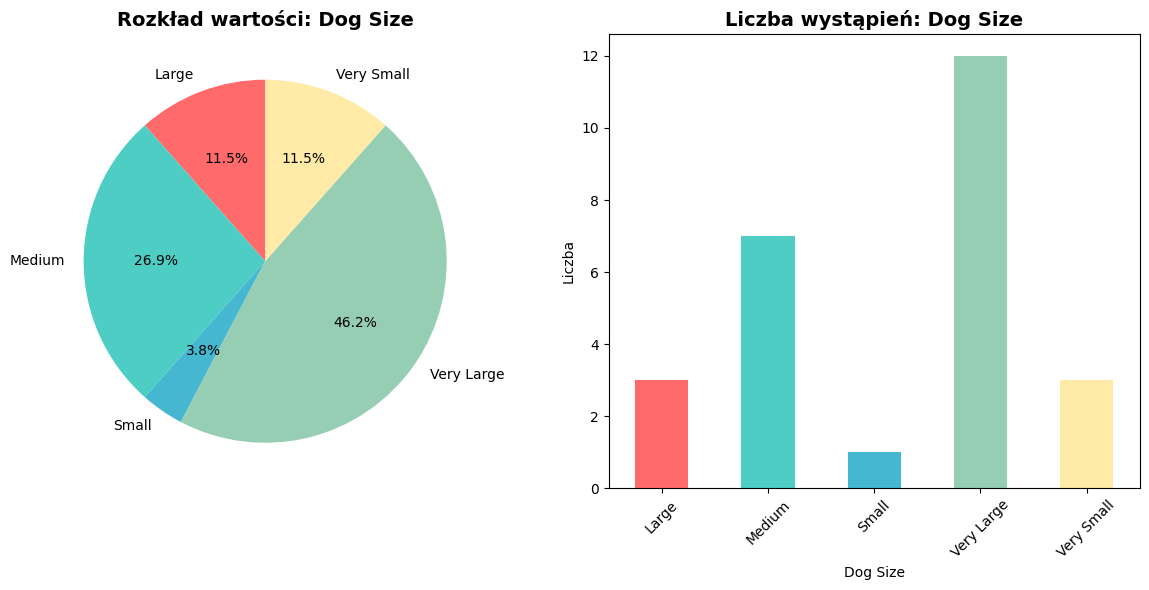

WYKRES DLA: Tolerates Being Alone


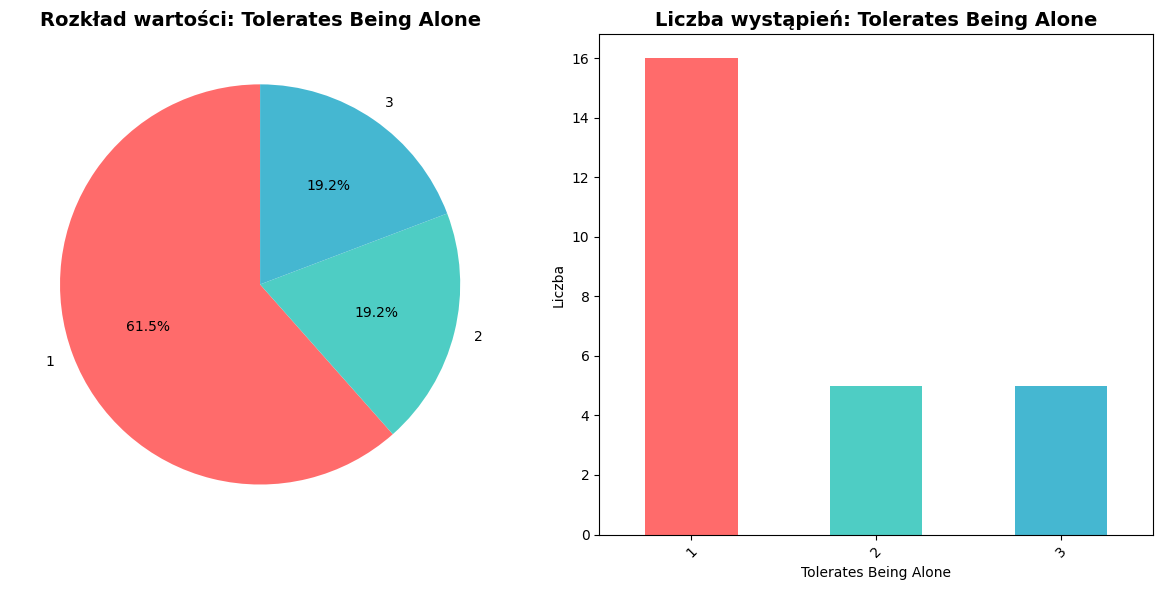

WYKRES DLA: Kid-Friendly


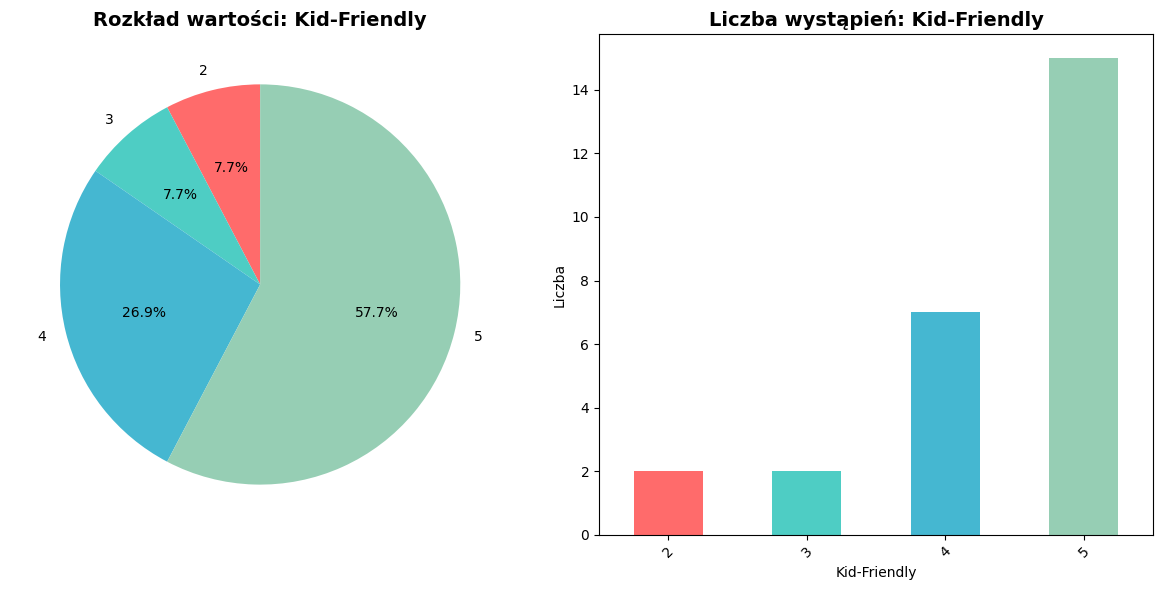

WYKRES DLA: Dog Friendly


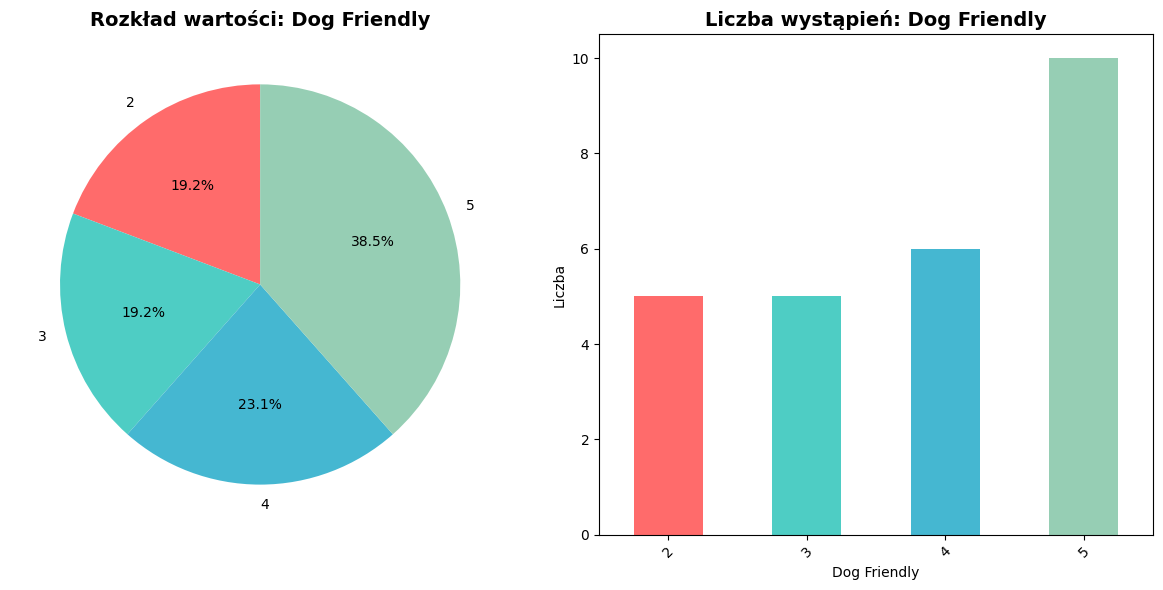

WYKRES DLA: Friendly Toward Strangers


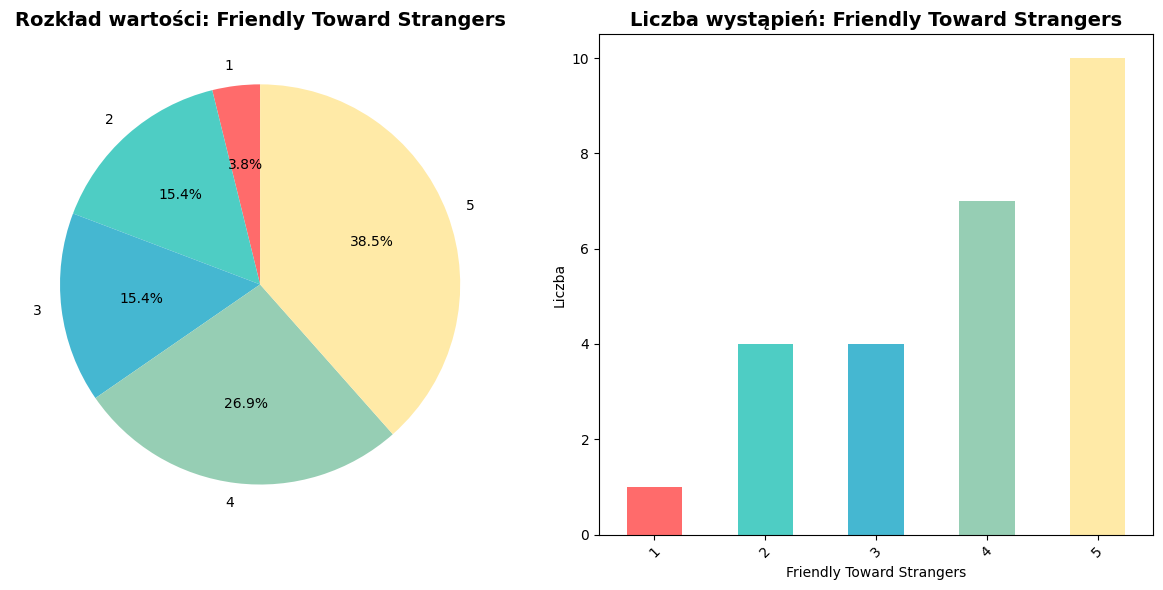

WYKRES DLA: Health And Grooming Needs


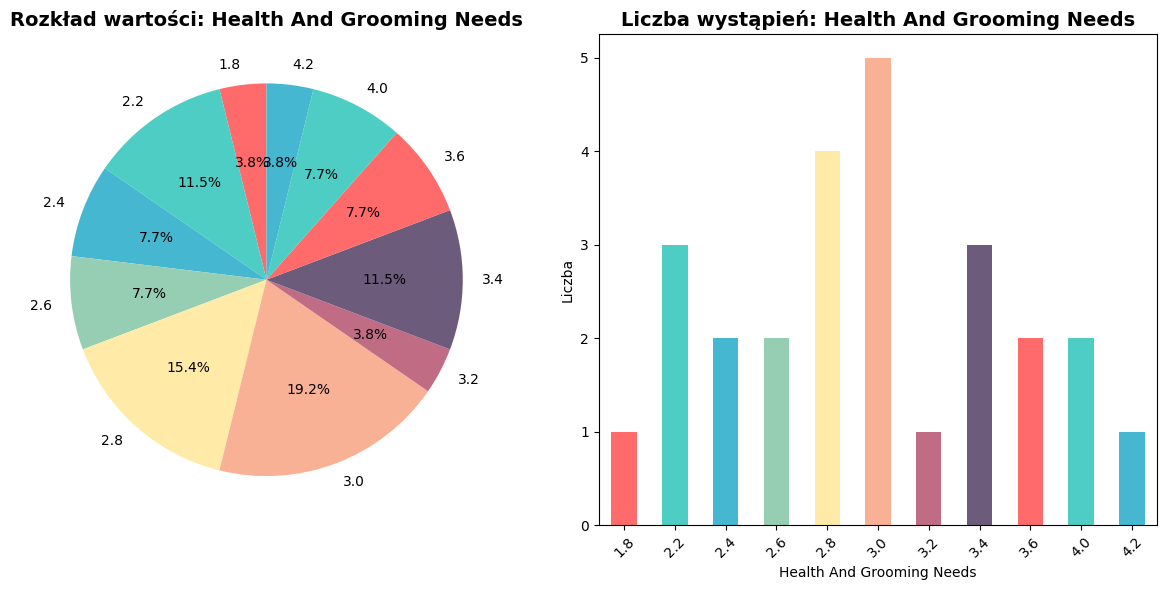

WYKRES DLA: Easy To Train


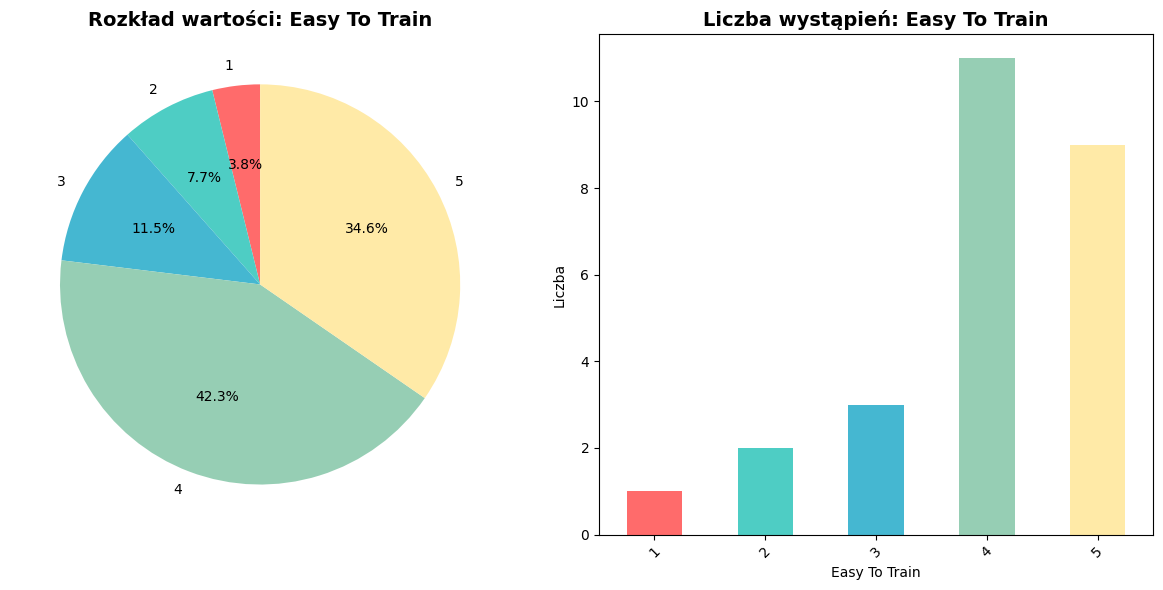

WYKRES DLA: Energy Level


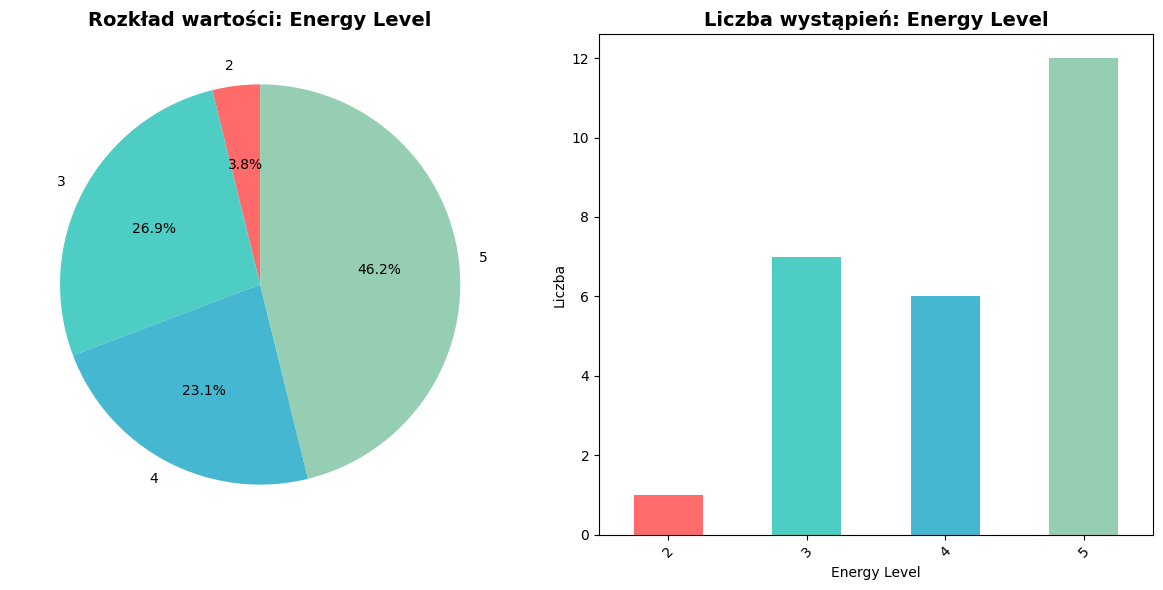

In [50]:
# Lista kolumn kategorycznych lub numerycznych z małą liczbą unikalnych wartości
columns_to_plot = [
    'Dog Size', 'Tolerates Being Alone', 'Kid-Friendly',
    'Dog Friendly', 'Friendly Toward Strangers',
    'Health And Grooming Needs', 'Easy To Train', 'Energy Level'
]

# Kolory do wykresów
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#F8B195', '#C06C84', '#6C5B7B']

for col in columns_to_plot:
    print("=" * 50)
    print(f"WYKRES DLA: {col}")
    print("=" * 50)

    plt.figure(figsize=(12, 6))

    # Pie Chart
    plt.subplot(1, 2, 1)
    value_counts = df_dogs[col].value_counts().sort_index()
    plt.pie(value_counts.values, labels=value_counts.index,
            autopct='%1.1f%%', colors=colors[:len(value_counts)], startangle=90)
    plt.title(f'Rozkład wartości: {col}', fontsize=14, fontweight='bold')

    # Bar Chart
    plt.subplot(1, 2, 2)
    value_counts.plot(kind='bar', color=colors[:len(value_counts)])
    plt.title(f'Liczba wystąpień: {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Liczba')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

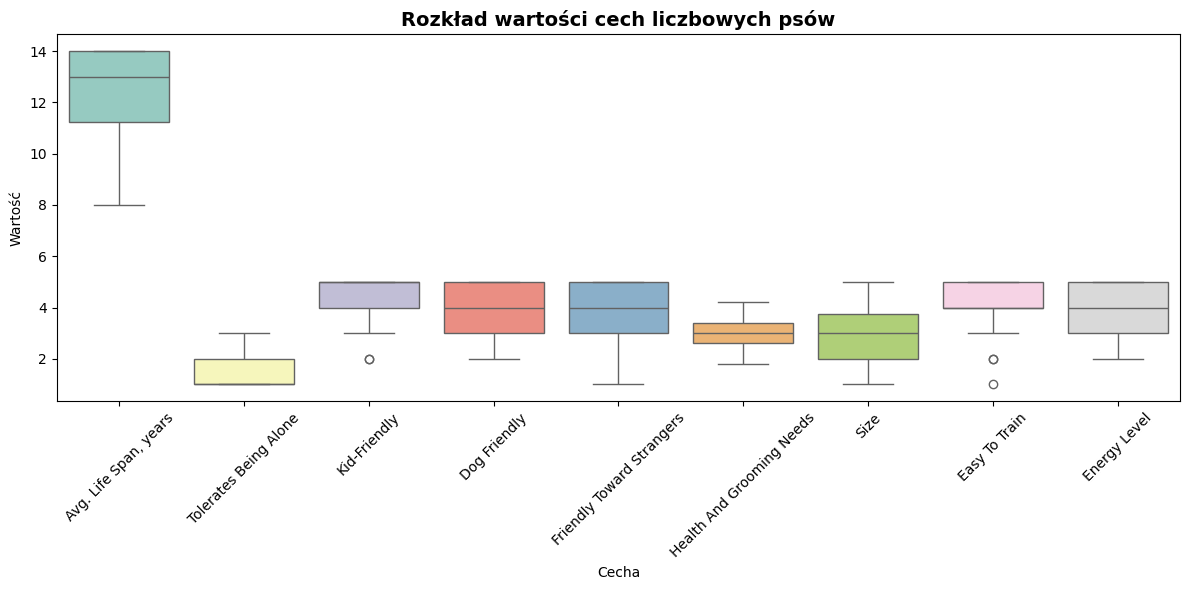

In [51]:
numeric_columns = df_dogs.select_dtypes(include='number').columns

df_long = df_dogs[numeric_columns].melt(var_name='Cecha', value_name='Wartość')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cecha', y='Wartość', hue='Cecha', data=df_long, palette='Set3', legend=False)
plt.title('Rozkład wartości cech liczbowych psów', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

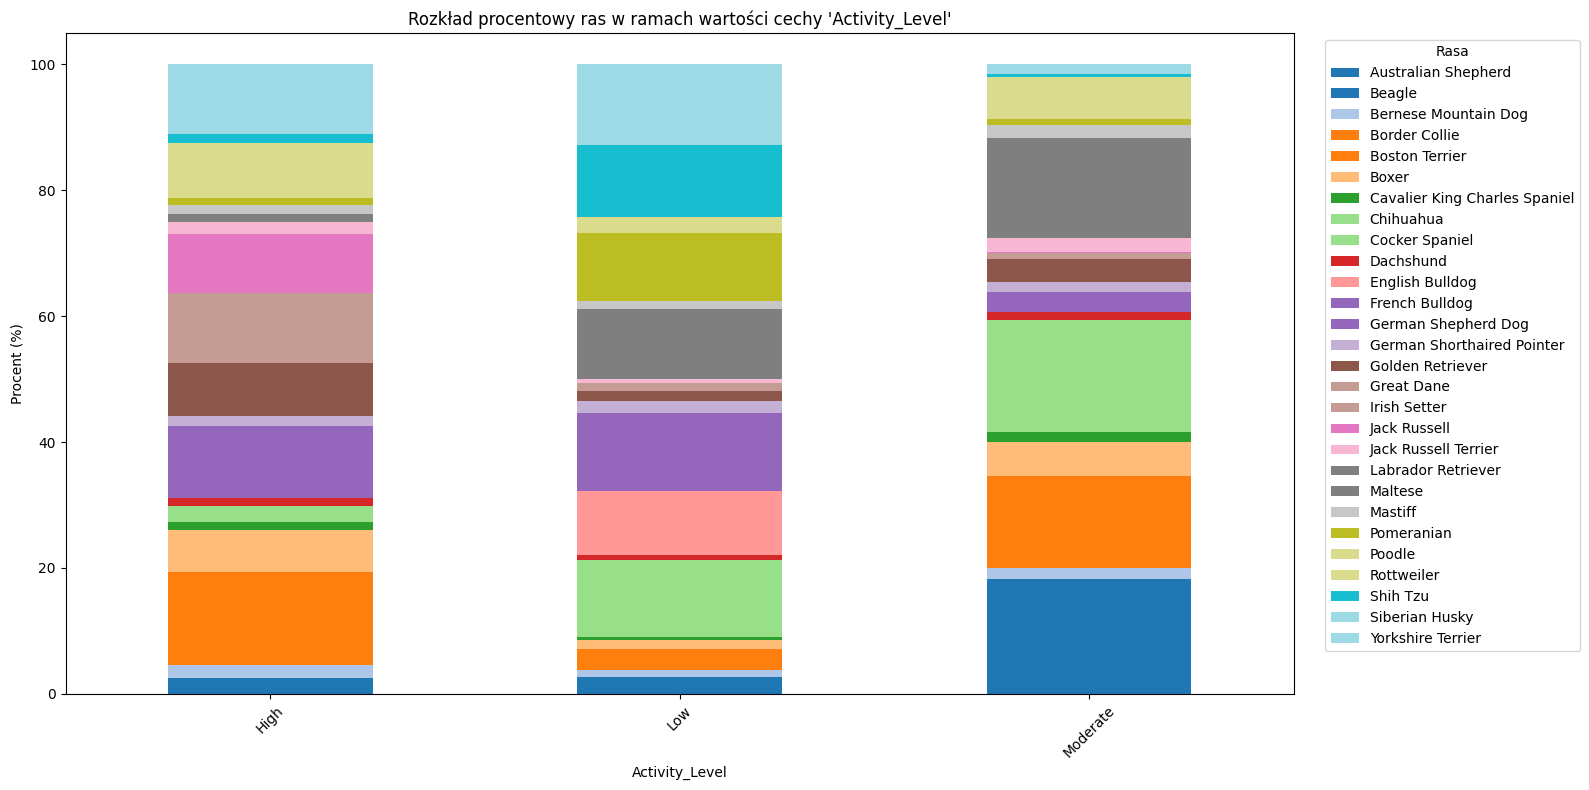

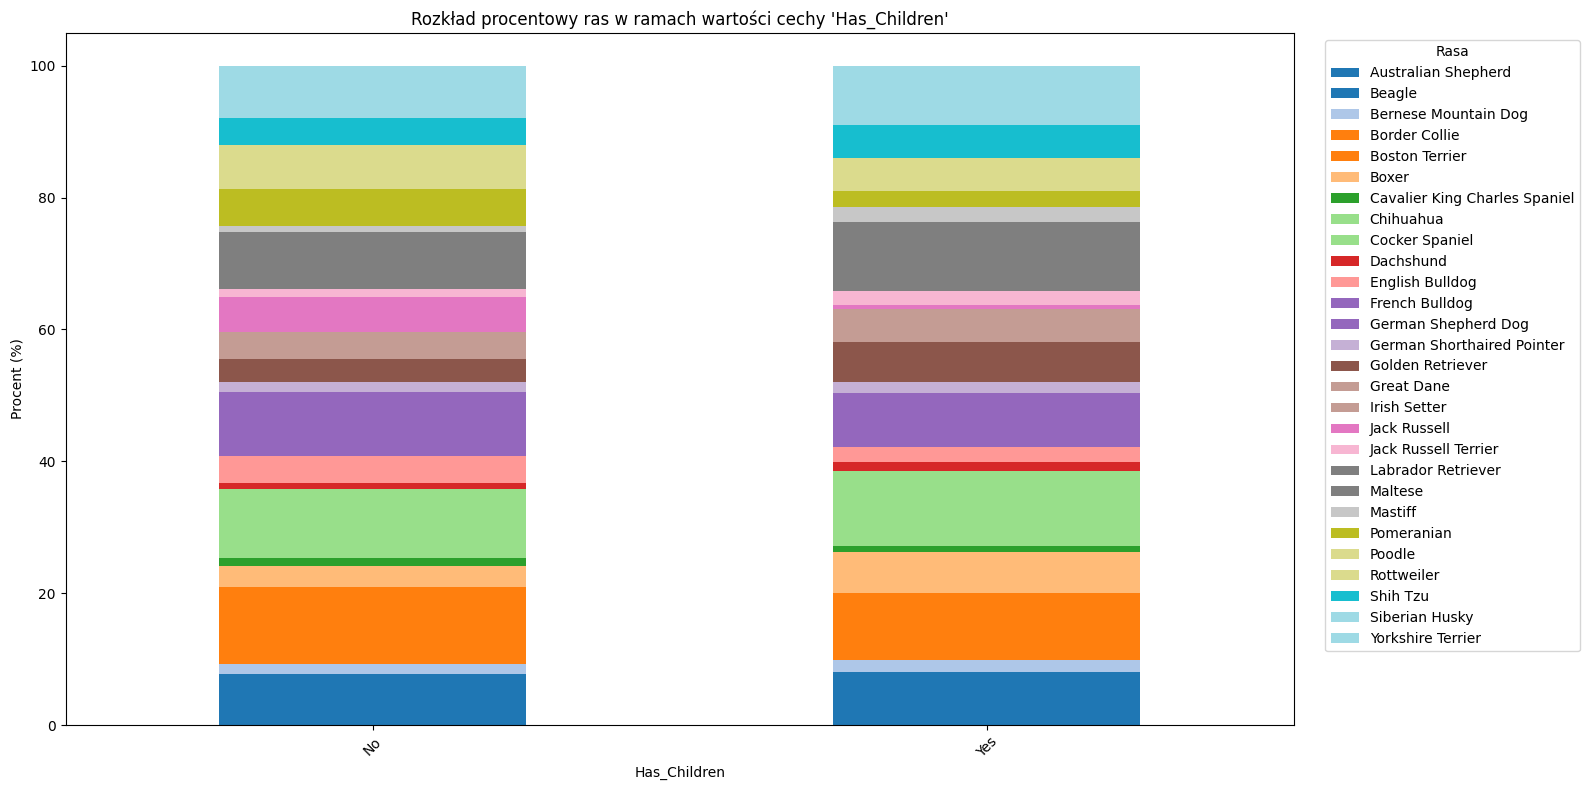

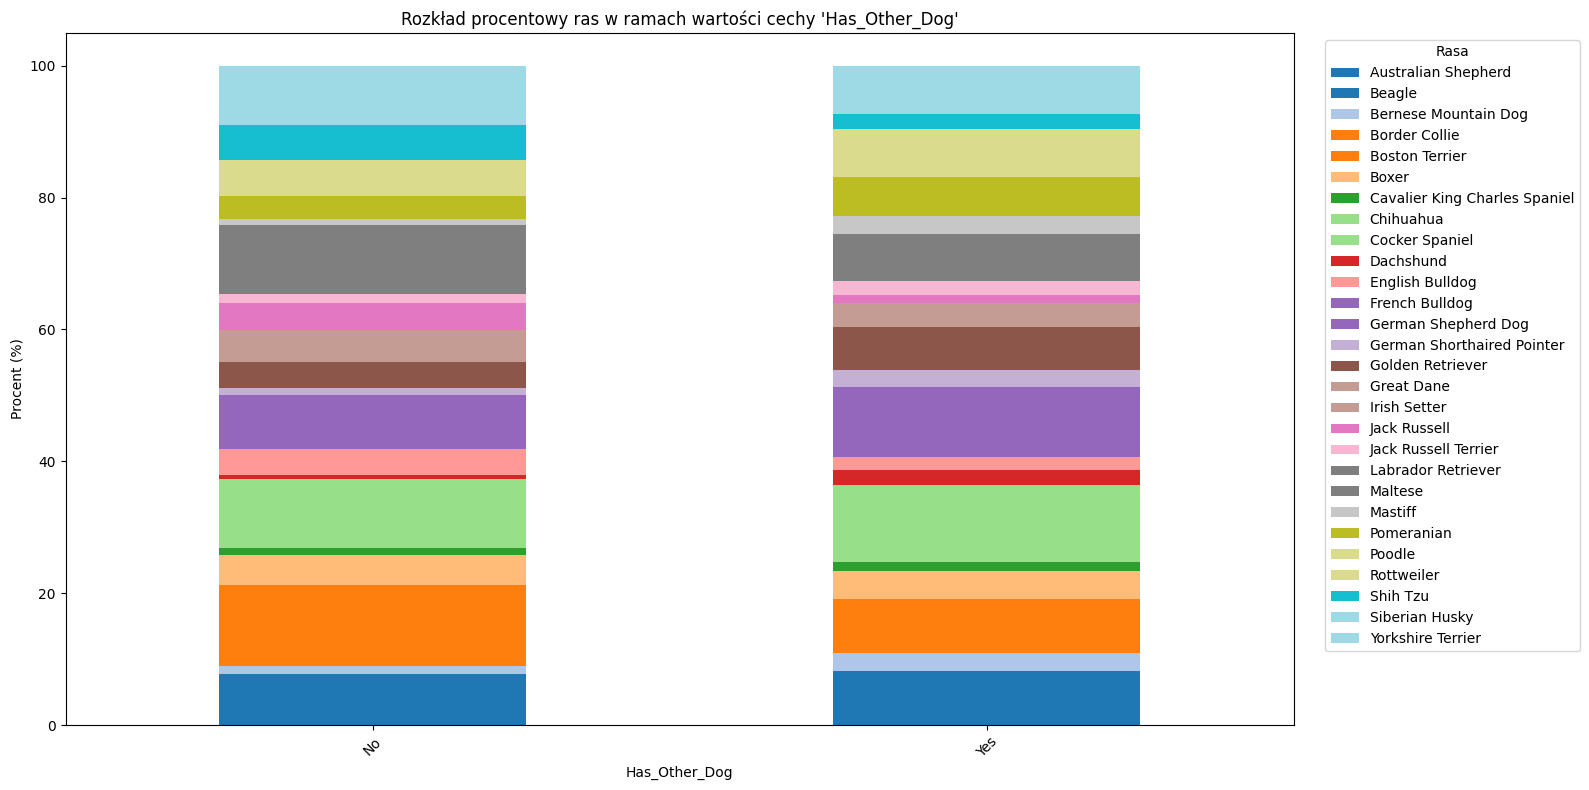

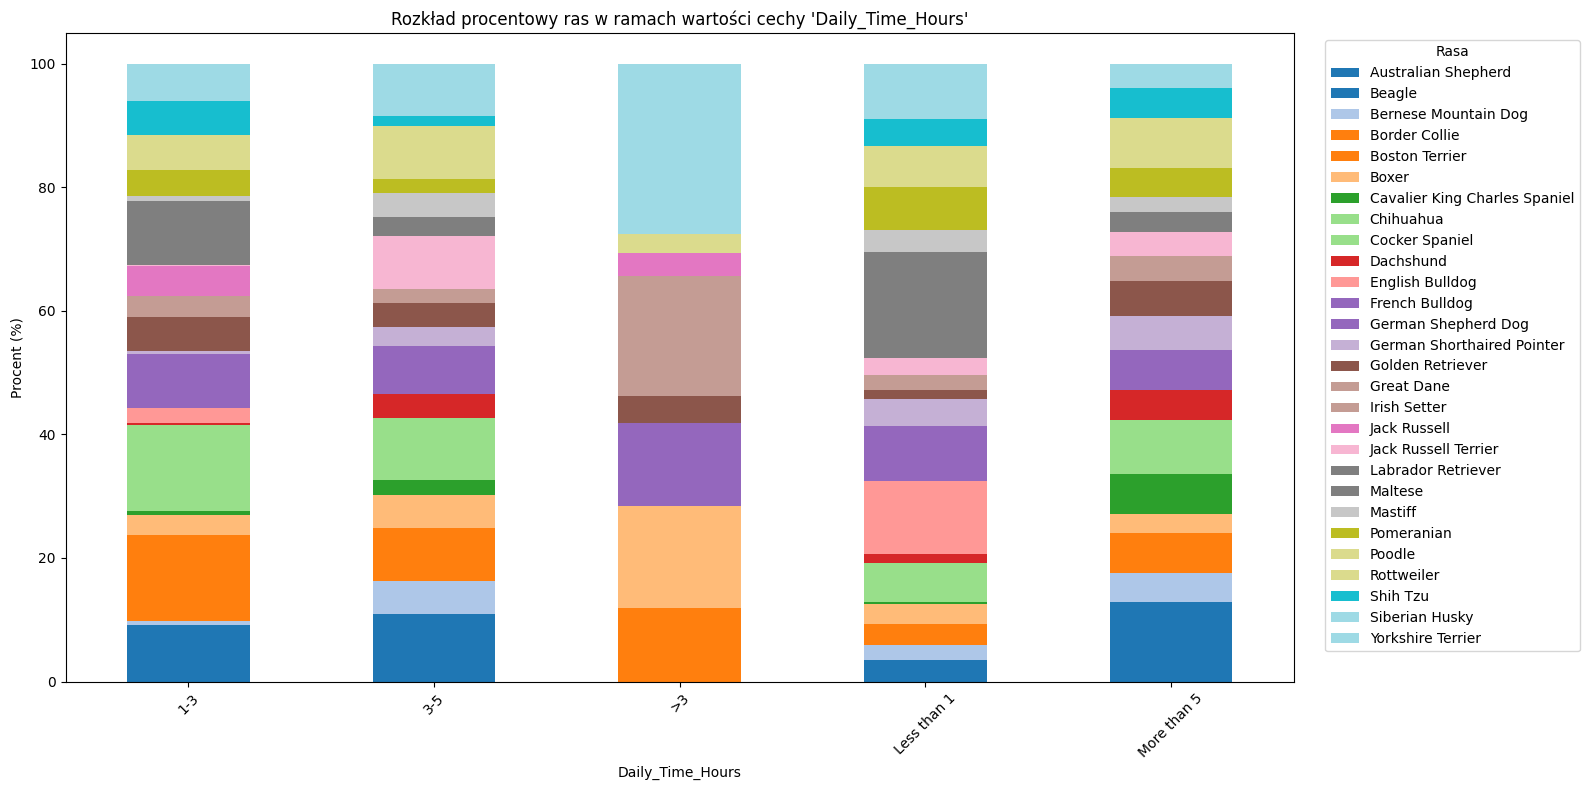

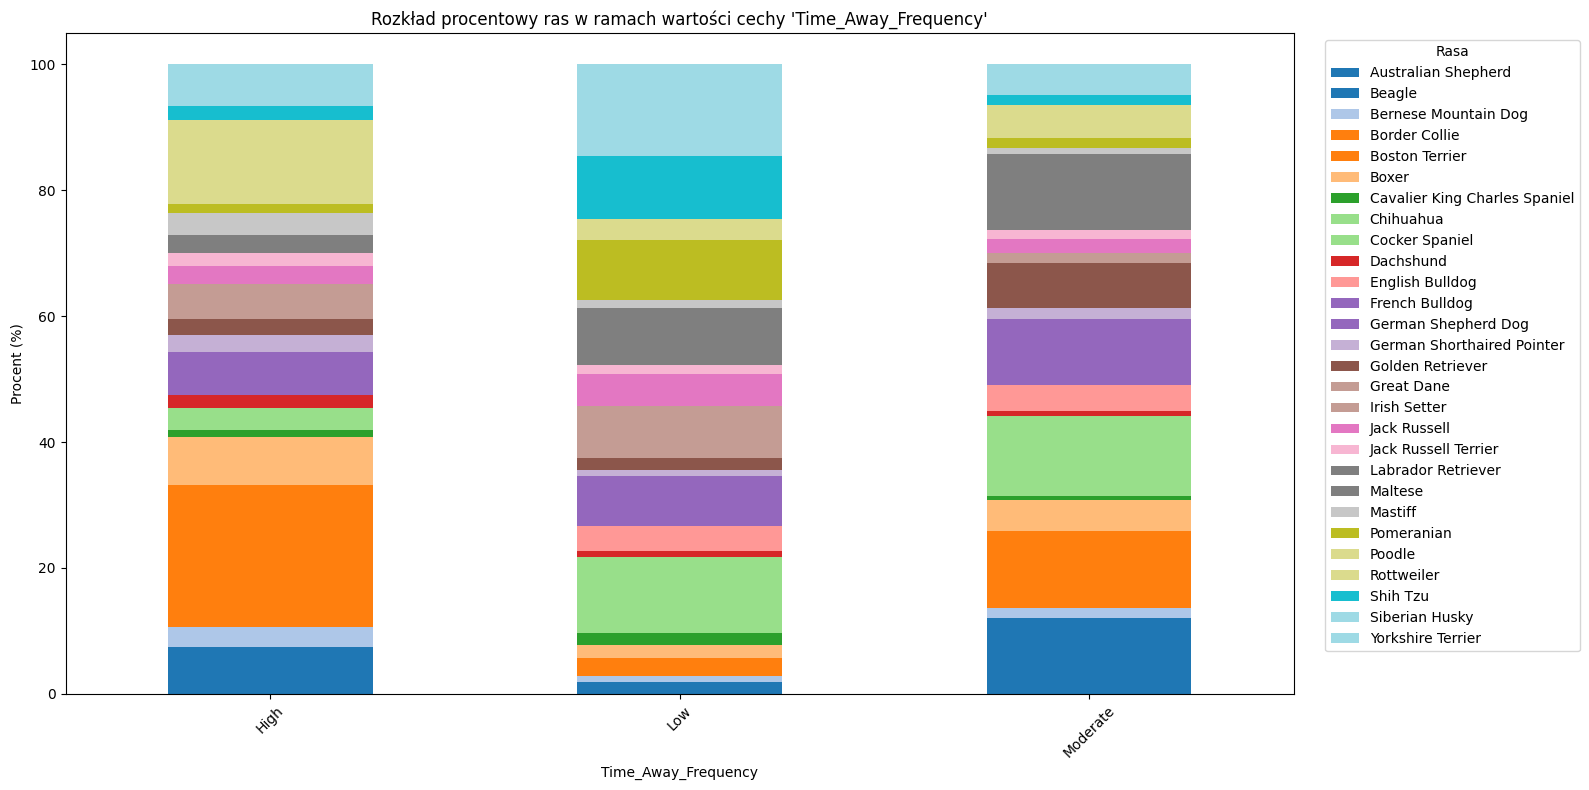

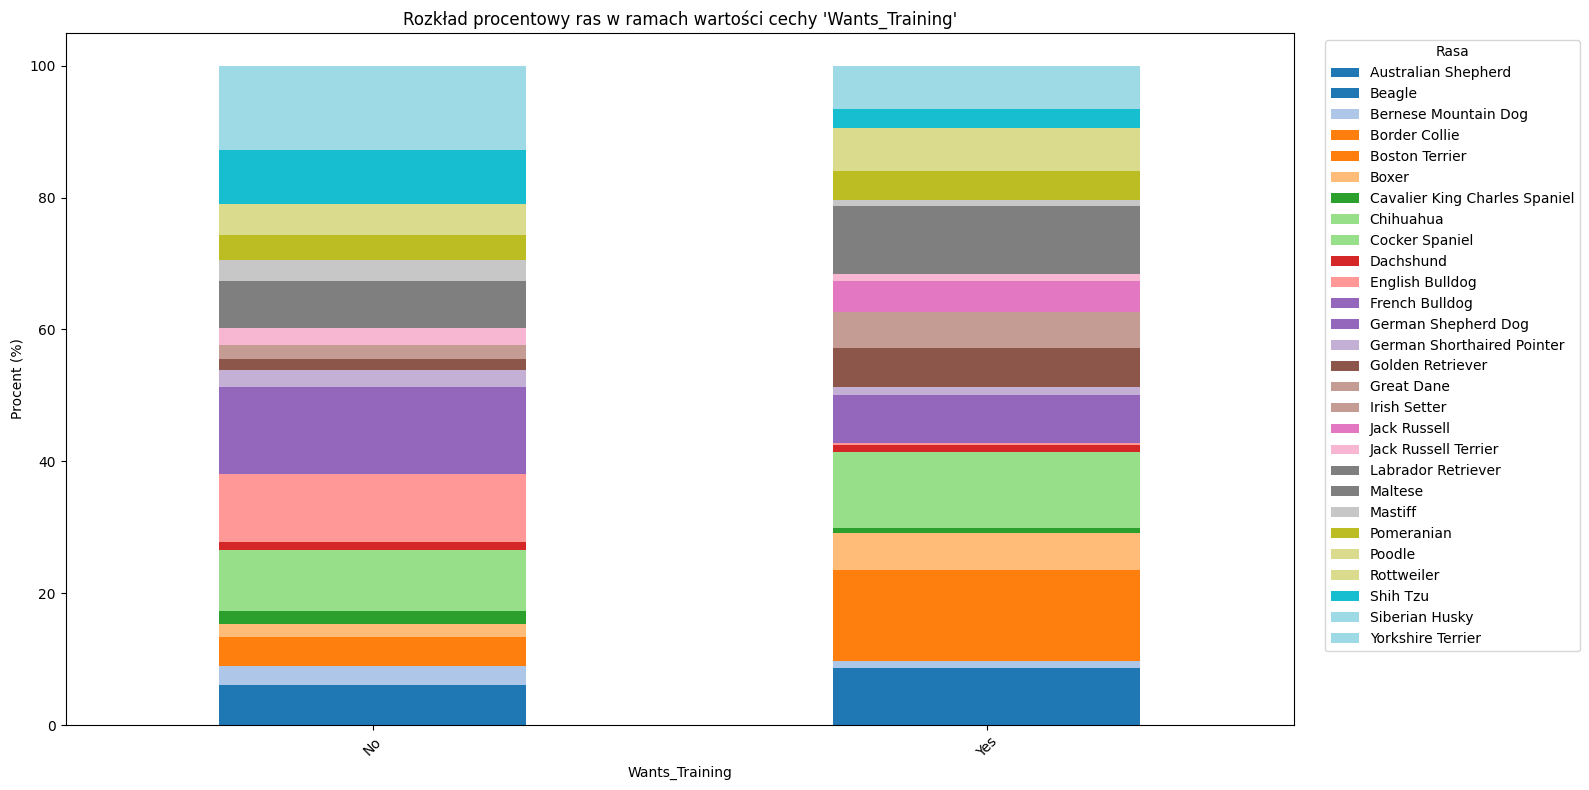

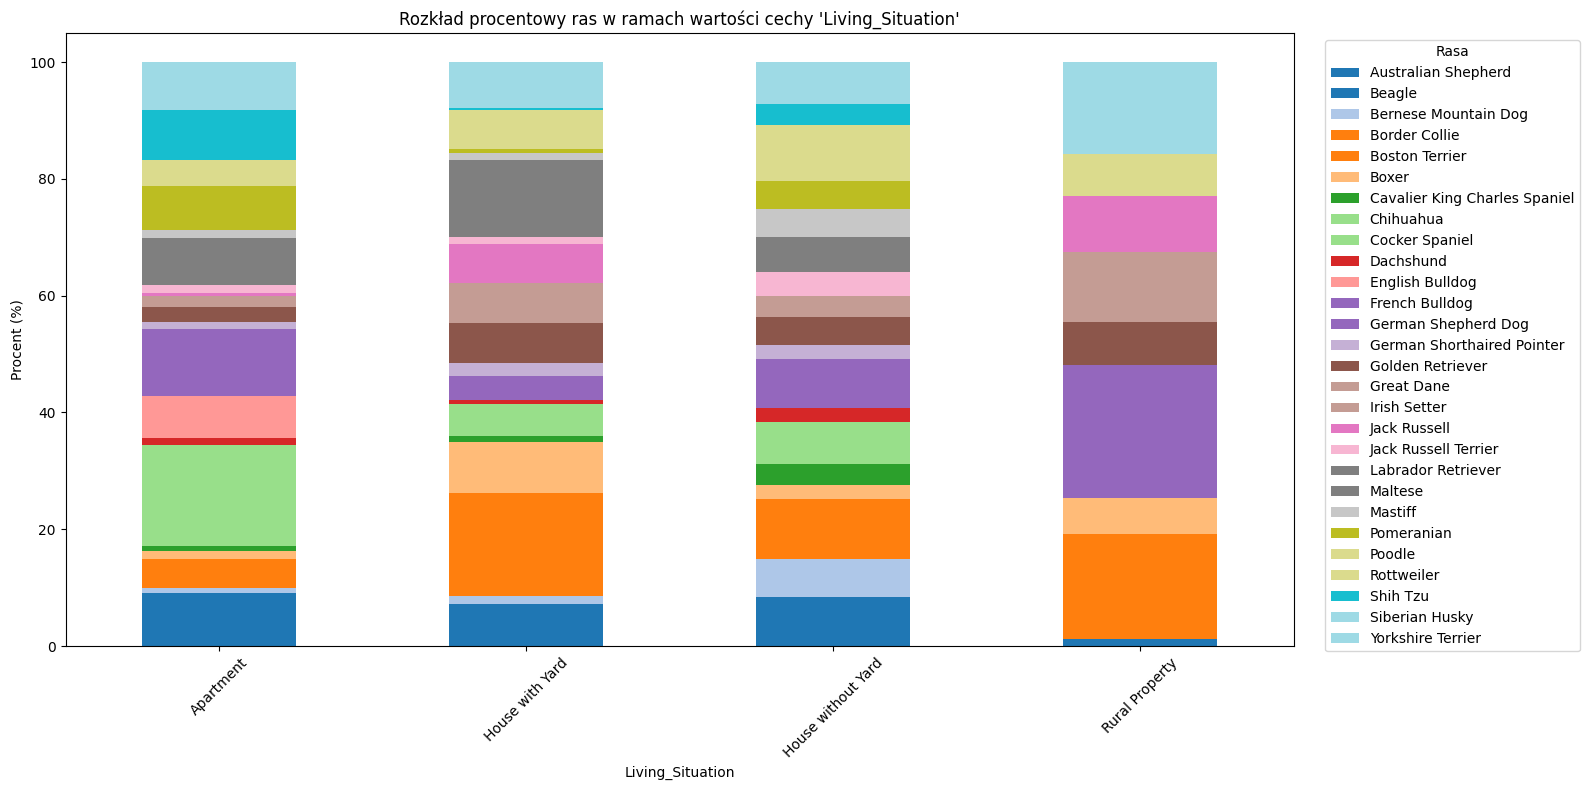

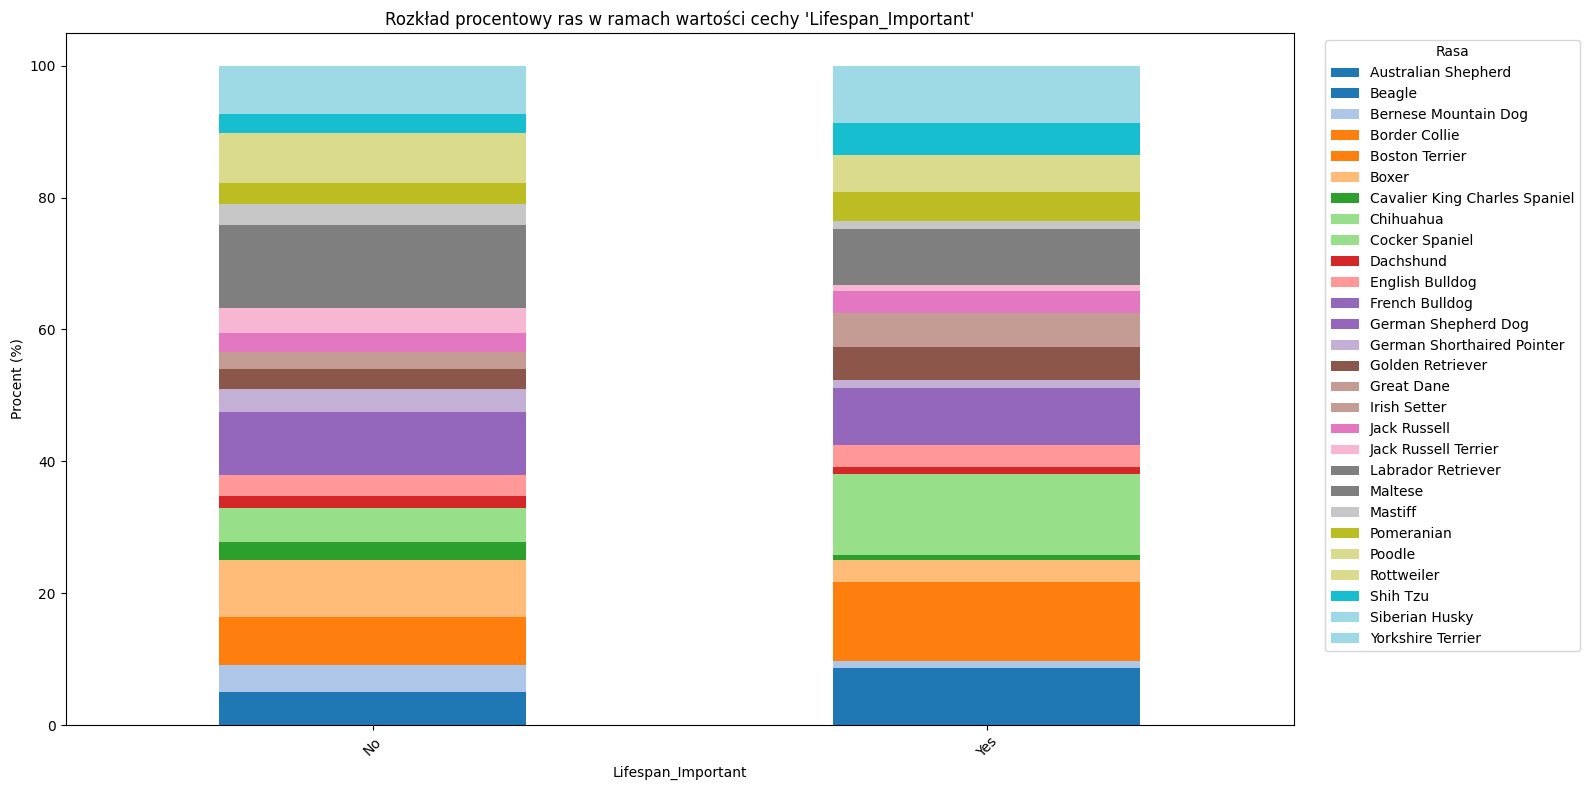

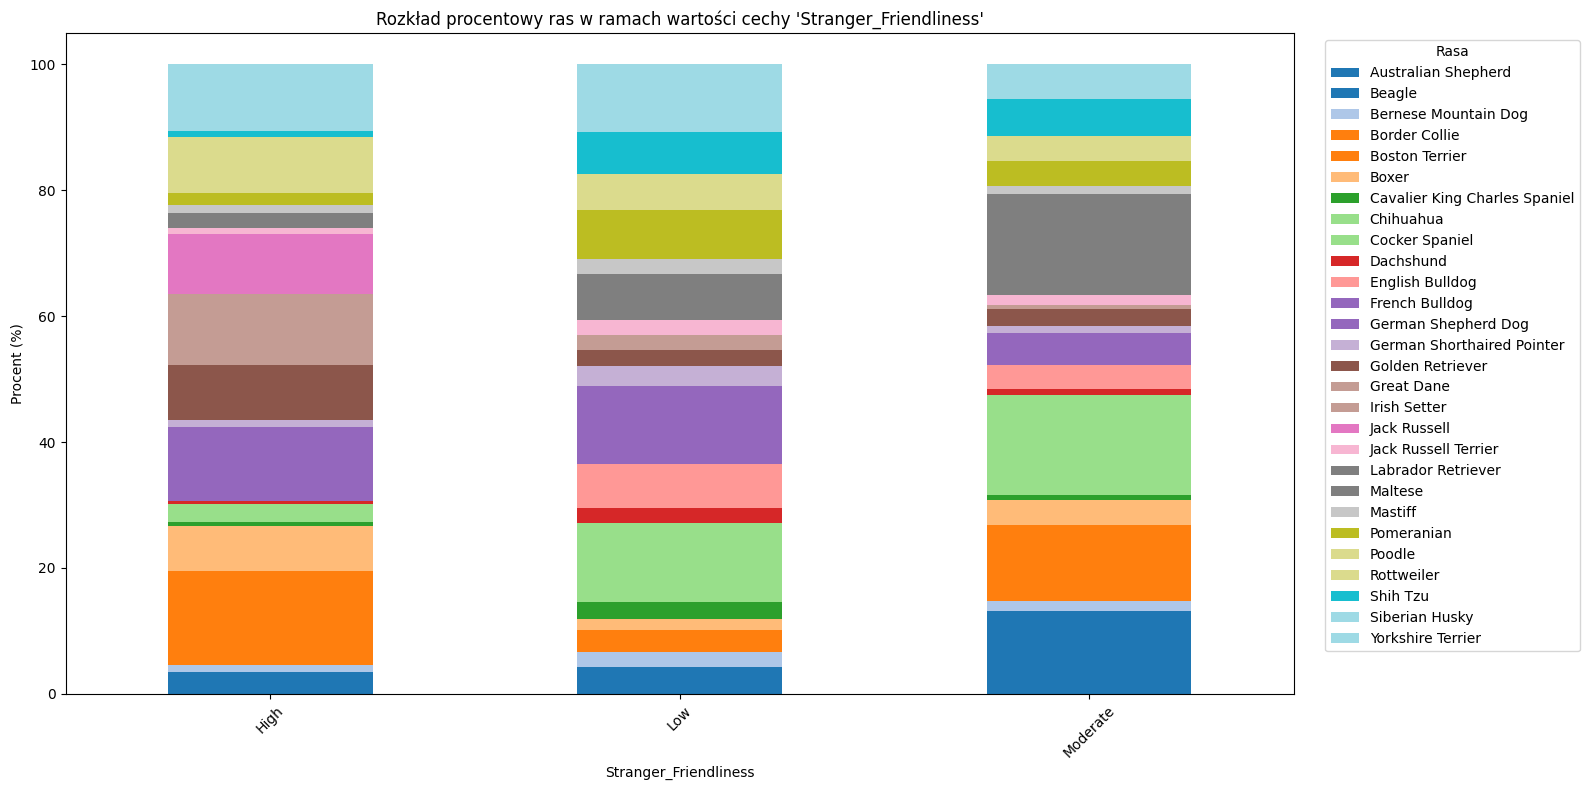

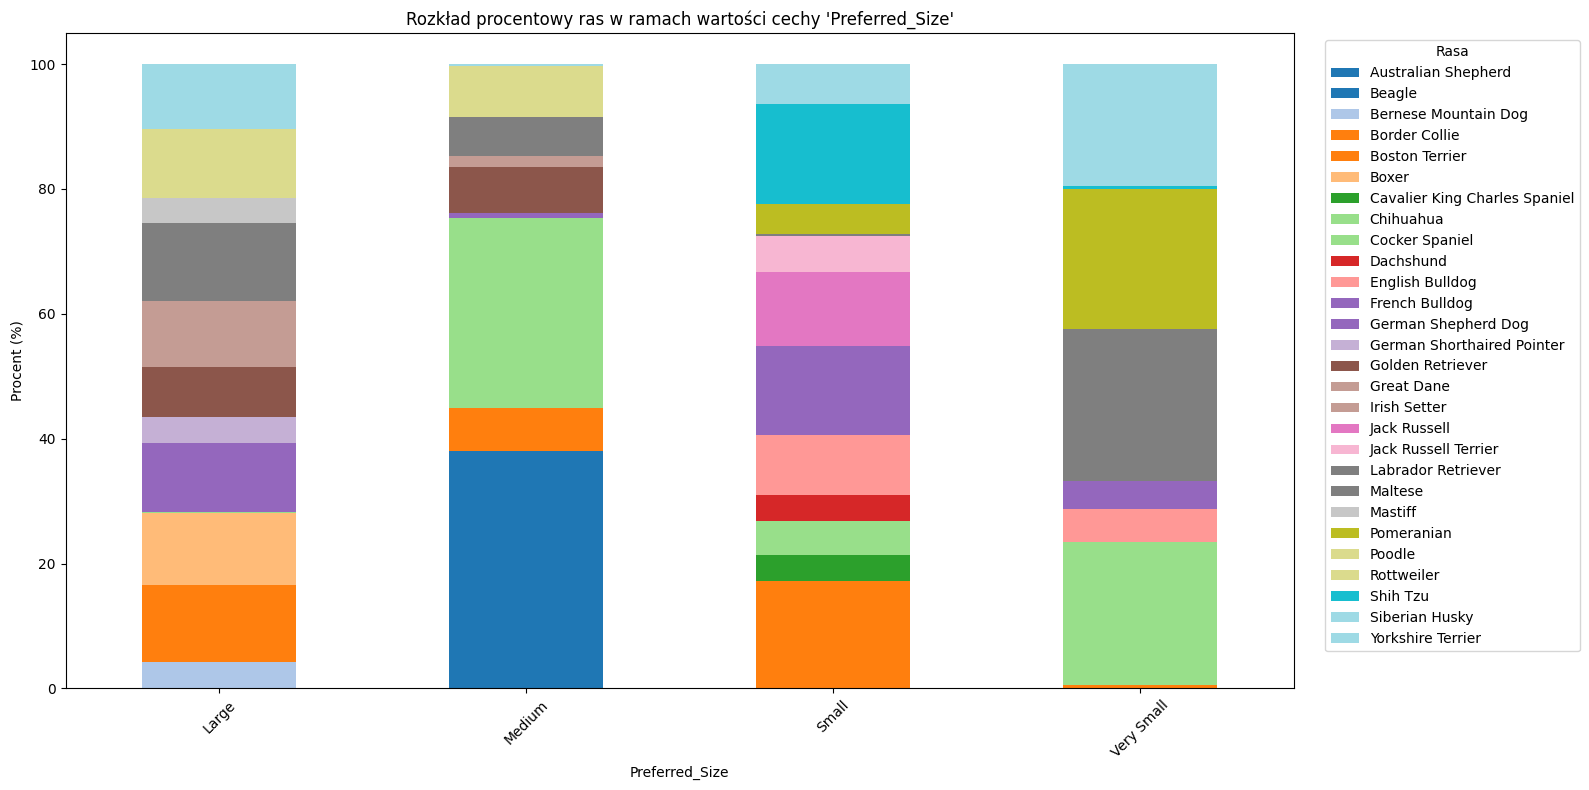

In [52]:
features = [
    'Activity_Level', 'Has_Children', 'Has_Other_Dog', 'Daily_Time_Hours',
    'Time_Away_Frequency', 'Wants_Training', 'Living_Situation',
    'Lifespan_Important', 'Stranger_Friendliness', 'Preferred_Size'
]


for feature in features:
    ctab = pd.crosstab(df_people[feature], df_people['Recommended_Breed'], normalize='index') * 100
    ctab.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='tab20')
    plt.title(f"Rozkład procentowy ras w ramach wartości cechy '{feature}'")
    plt.ylabel("Procent (%)")
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Rasa')
    plt.tight_layout()
    plt.show()

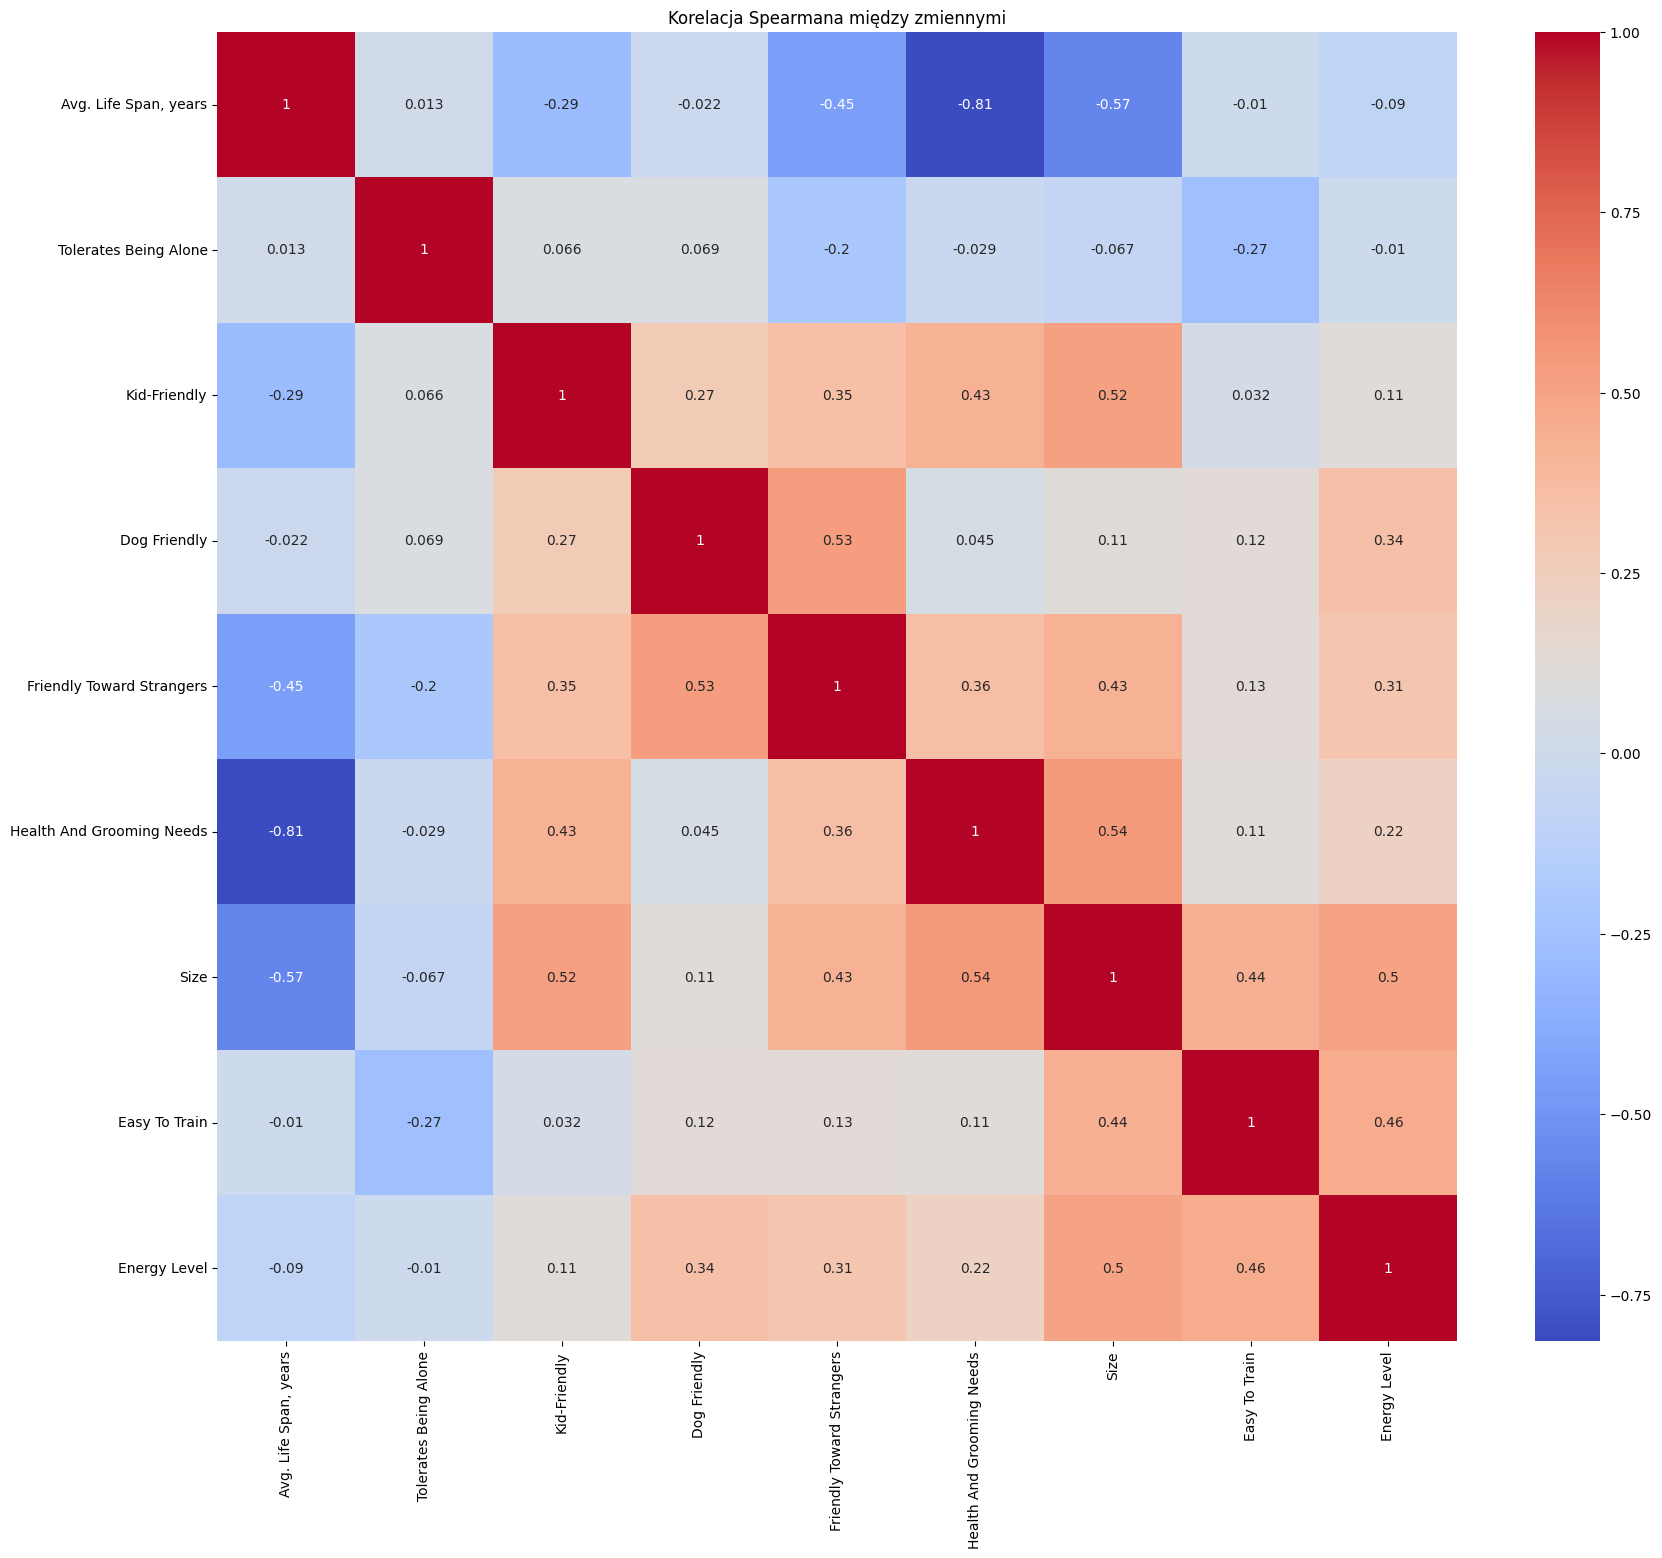

In [53]:
plt.figure(figsize=(20, 17))
sns.heatmap(df_dogs.corr(method='spearman', numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Korelacja Spearmana między zmiennymi")
plt.show()

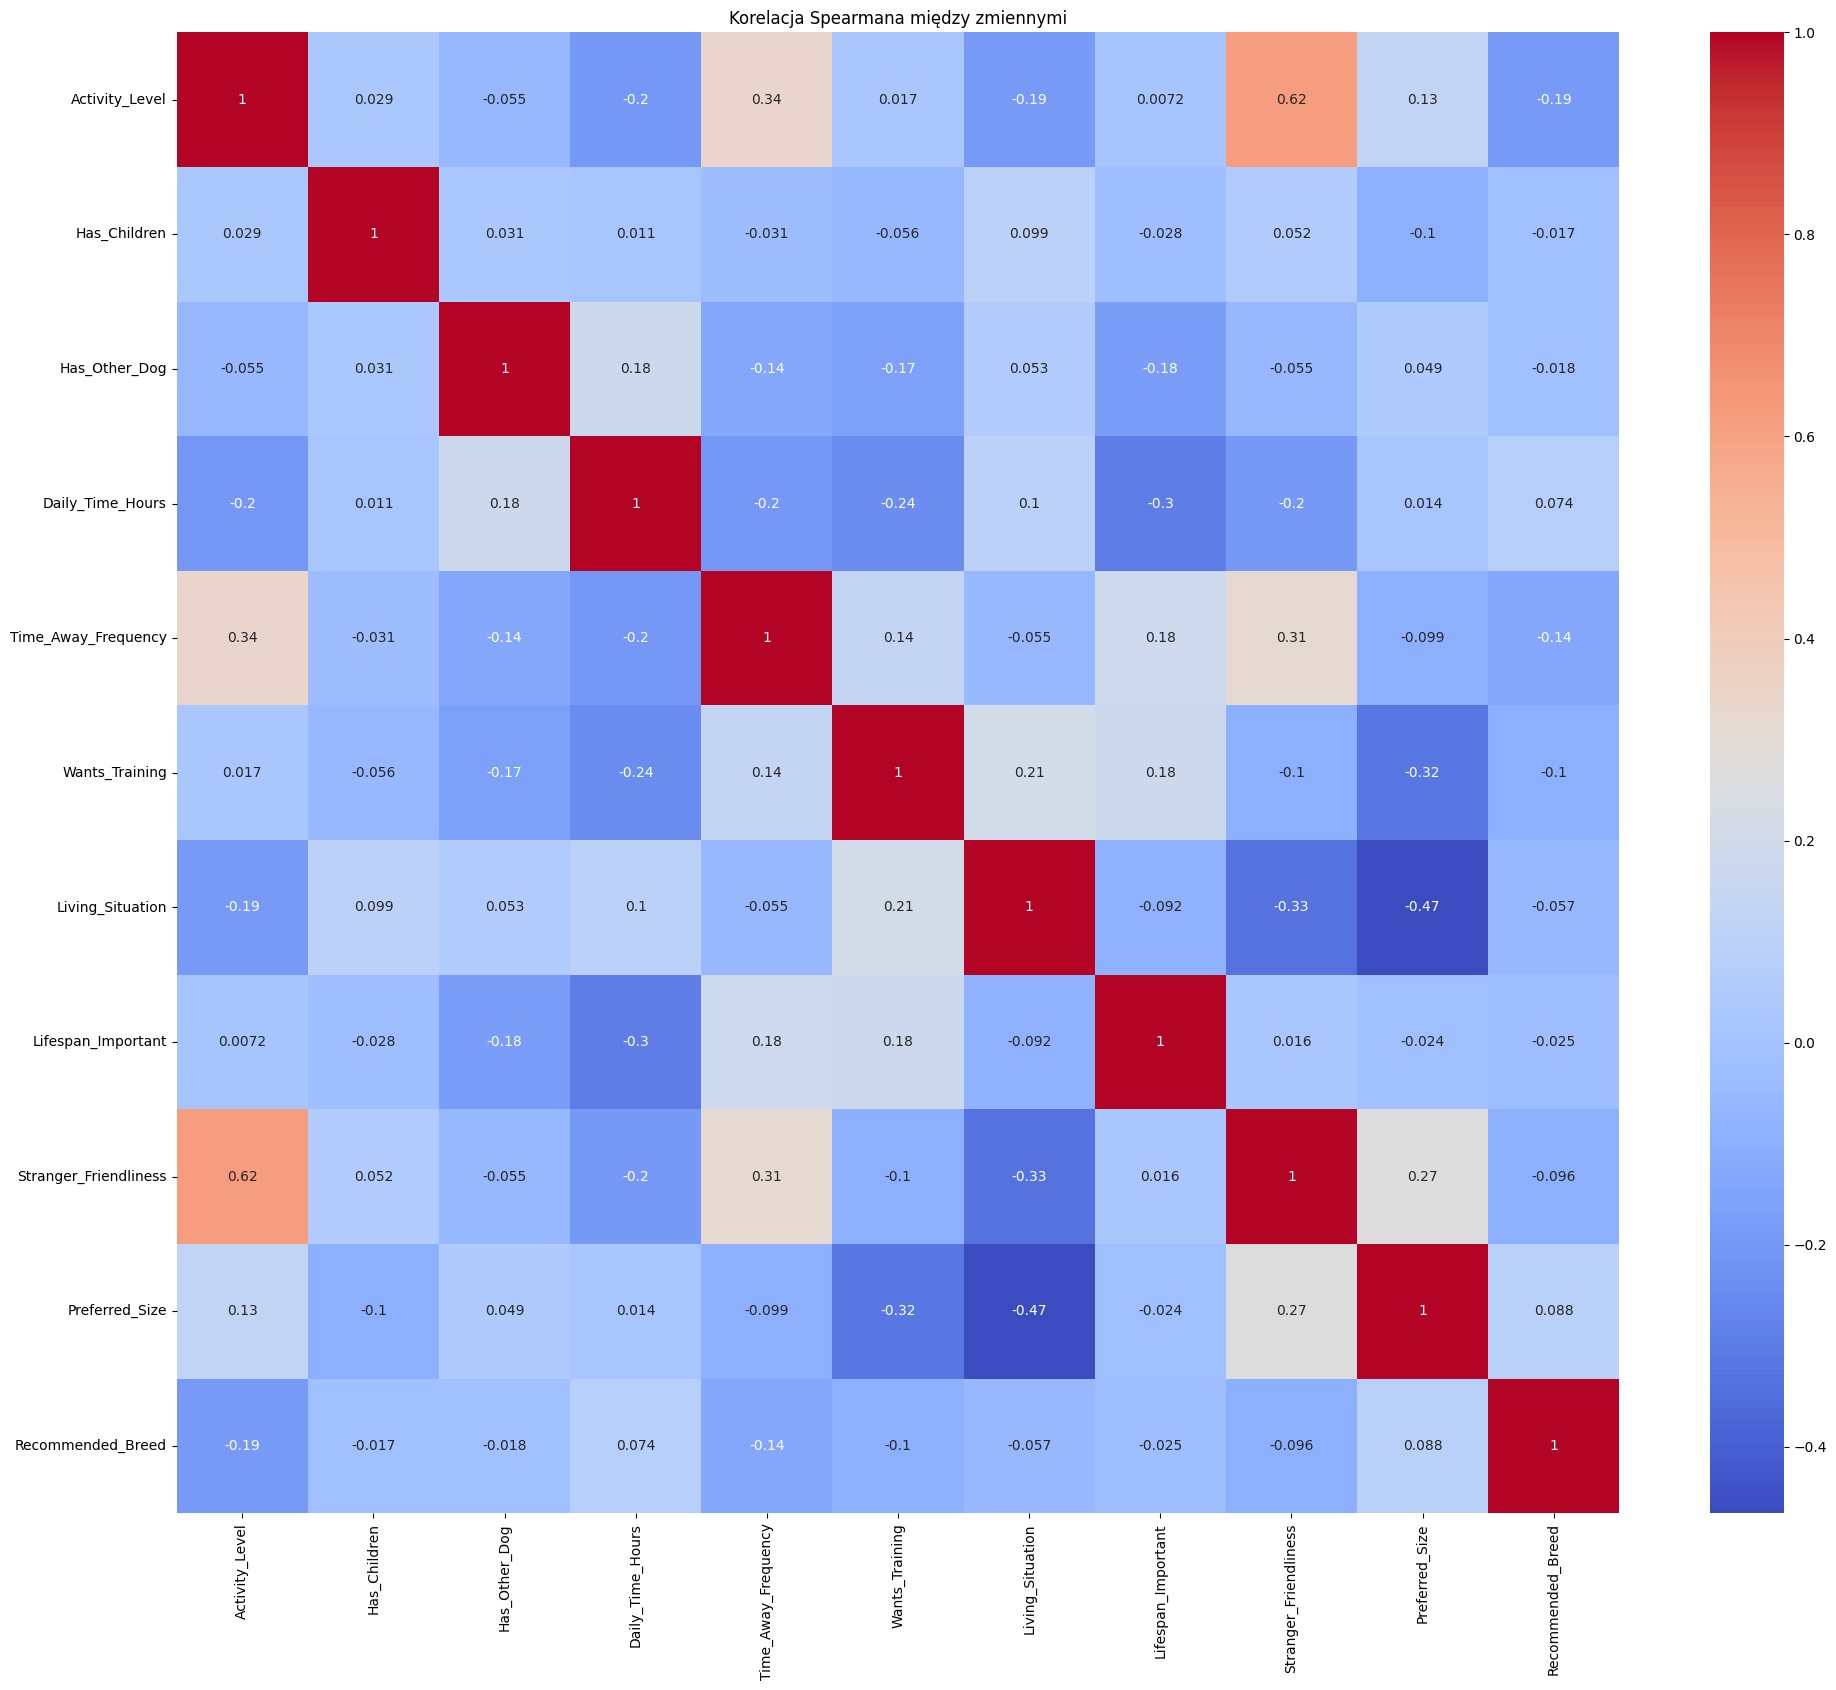

In [54]:
df_encoded = df_people.copy()

for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

if df_encoded.shape[1] > 0:
    plt.figure(figsize=(20, 17))
    sns.heatmap(df_encoded.corr(method='spearman'), annot=True, cmap='coolwarm')
    plt.title("Korelacja Spearmana między zmiennymi")
    plt.tight_layout()
    plt.show()
else:
    print("Brak kolumn liczbowych do wyświetlenia macierzy korelacji.")

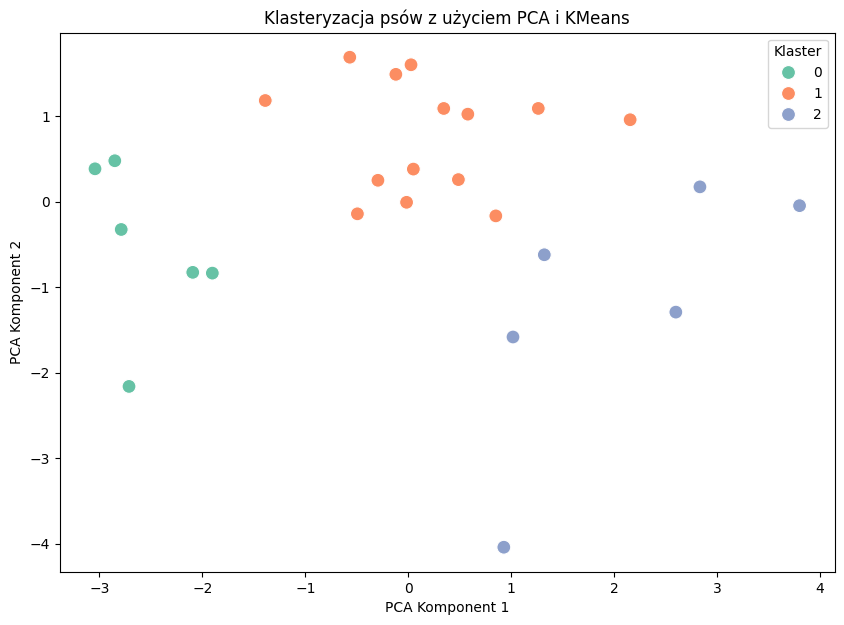

In [55]:
numeric_cols = df_dogs.select_dtypes(include='number').columns
X = df_dogs[numeric_cols]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)


df_dogs['Cluster'] = clusters


plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=100)
plt.title('Klasteryzacja psów z użyciem PCA i KMeans')
plt.xlabel('PCA Komponent 1')
plt.ylabel('PCA Komponent 2')
plt.legend(title='Klaster')
plt.show()

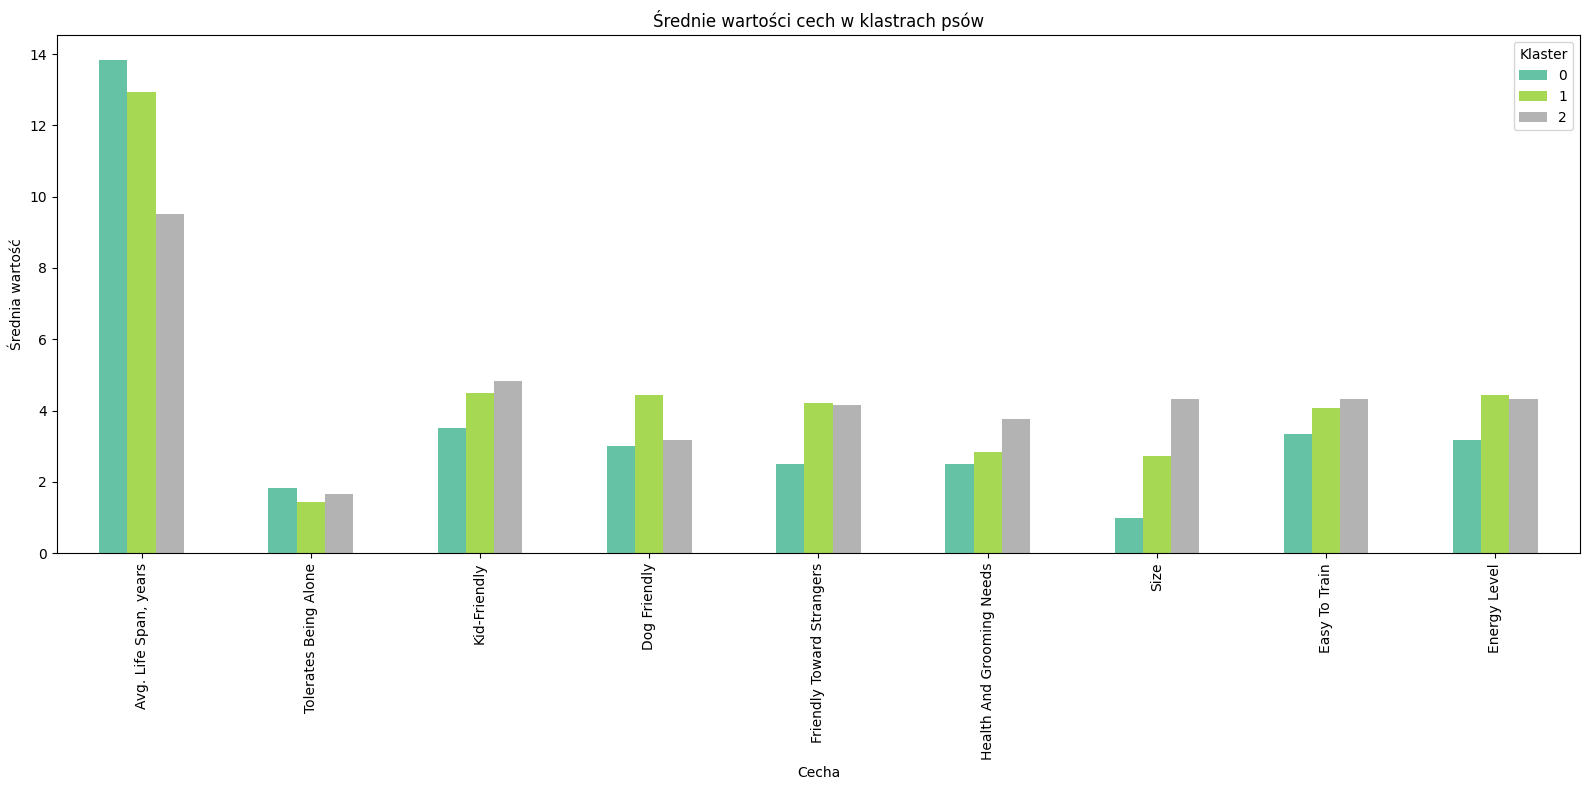

In [56]:
features = df_dogs.select_dtypes(include=['int64', 'float64']).columns.tolist()

cluster_summary = df_dogs.groupby('Cluster')[features].mean()

cluster_summary.T.plot(kind='bar', figsize=(16, 8), colormap='Set2')
plt.title("Średnie wartości cech w klastrach psów")
plt.ylabel("Średnia wartość")
plt.xlabel("Cecha")
plt.legend(title='Klaster')
plt.tight_layout()
plt.show()

# XGBoost

In [57]:
mappings = {
    'Activity_Level': {'Low': 0, 'Moderate': 1, 'High': 2},
    'Has_Children': {'No': 0, 'Yes': 1},
    'Has_Other_Dog': {'No': 0, 'Yes': 1},
    'Daily_Time_Hours': {'Less than 1': 0, '1-3': 1, '3-5': 2, '>3': 3, 'More than 5': 4},
    'Time_Away_Frequency': {'Low': 0, 'Moderate': 1, 'High': 2},
    'Wants_Training': {'No': 0, 'Yes': 1},
    'Living_Situation': {'Apartment': 0, 'House with Yard': 1, 'Rural Property': 2, 'House without Yard': 3},
    'Lifespan_Important': {'No': 0, 'Yes': 1},
    'Stranger_Friendliness': {'Low': 0, 'Moderate': 1, 'High': 2},
    'Preferred_Size': {'Very Small': 0, 'Small': 1, 'Medium': 2, 'Large': 3}
}

people_encoded = df_people.copy()
for col, mapping in mappings.items():
    if col in people_encoded.columns:
        people_encoded[col] = people_encoded[col].map(mapping)

In [58]:
#Połączenie cech psów z odpowiedziami użytkowników
full_df = people_encoded.merge(df_dogs, left_on='Recommended_Breed', right_on='Breed Name', how='inner')


In [59]:
#Ustalenie celu i cech
X = full_df.drop(columns=['Recommended_Breed', 'Breed Name', 'Dog Size', 'Detailed Description Link'])
y = full_df['Recommended_Breed']

In [60]:
#Kodowanie celu (czyli rasy psa)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [61]:
#Podział na zbiory
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Dokładność na zbiorze testowym: 1.0000
Raport klasyfikacji:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00         4
          15 

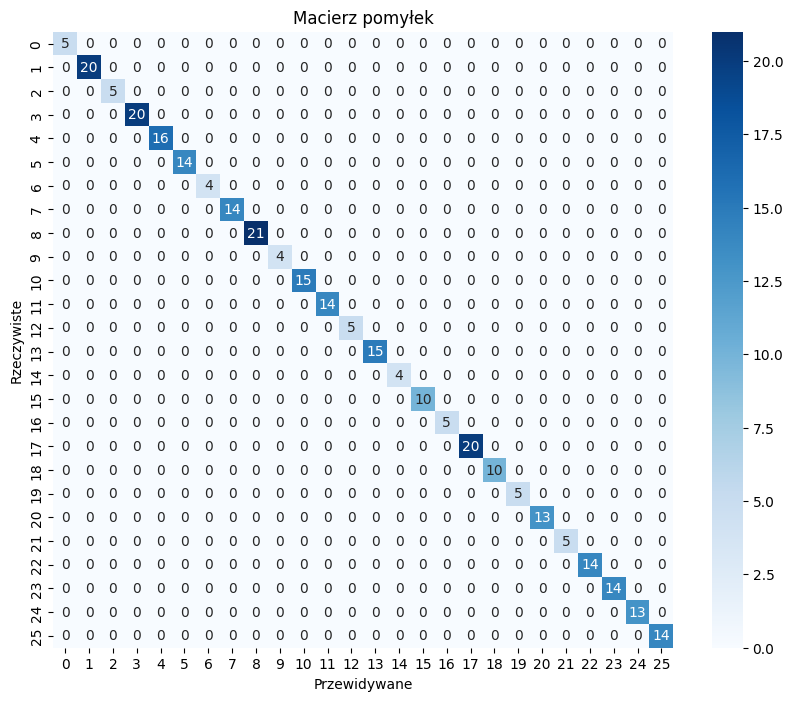

In [62]:
#Model XGBoost z regularizacją
model = XGBClassifier(
    eval_metric='mlogloss', 
    objective='multi:softmax',  
    colsample_bytree=0.8,  
    subsample=0.8,  
    gamma=0.1, 
    n_jobs=-1  
)

# Zoptymalizowany zakres hiperparametrów
param_dist = {
    'n_estimators': [50, 100],  
    'learning_rate': [0.1, 0.05],  
    'subsample': [0.7, 0.8],  
    'colsample_bytree': [0.7, 0.8],
    'gamma': [0, 0.1]  
}

#RandomizedSearchCV zamiast GridSearchCV
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=20, cv=3, 
    scoring='accuracy', verbose=1, n_jobs=-1, random_state=42
)

#Dopasowanie modelu
random_search.fit(X_train, y_train)

#Najlepszy model
best_model = random_search.best_estimator_

#Dokładność na zbiorze testowym
accuracy = best_model.score(X_test, y_test)
print(f"Dokładność na zbiorze testowym: {accuracy:.4f}")

#Predykcja na zbiorze testowym
y_pred = best_model.predict(X_test)

#Raport klasyfikacji
print("Raport klasyfikacji:\n", classification_report(y_test, y_pred))

#Macierz pomyłek
cm = confusion_matrix(y_test, y_pred)

#Rysowanie macierzy pomyłek
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Przewidywane')
plt.ylabel('Rzeczywiste')
plt.title('Macierz pomyłek')
plt.show()


#CatBoost - nie wiem jak zrobić piękny duży napis, jak ktoś wie to niech poprawi :)

In [63]:

# ===============================
# Model CatBoost (alternatywa dla XGBoost)
# ===============================
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

catboost_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3,
    loss_function='MultiClass',
    verbose=100,
    random_state=42
)

catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=30)

# Ewaluacja
y_cat_pred = catboost_model.predict(X_test)
print("CatBoost - Raport klasyfikacji:")
print(classification_report(y_test, y_cat_pred))


0:	learn: 2.8033560	test: 2.8053447	best: 2.8053447 (0)	total: 5.11ms	remaining: 1.53s
100:	learn: 0.0507234	test: 0.0518820	best: 0.0518820 (100)	total: 474ms	remaining: 933ms
200:	learn: 0.0150313	test: 0.0154334	best: 0.0154334 (200)	total: 948ms	remaining: 467ms
299:	learn: 0.0084297	test: 0.0086613	best: 0.0086613 (299)	total: 1.42s	remaining: 0us

bestTest = 0.00866129803
bestIteration = 299

CatBoost - Raport klasyfikacji:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        21
           9       1.00  

In [64]:

from sklearn.metrics import accuracy_score

# Dokładność
xgb_acc = accuracy_score(y_test, y_pred)
cat_acc = accuracy_score(y_test, y_cat_pred)

print(f"🎯 Dokładność XGBoost:  {xgb_acc:.4f}")
print(f"🐱 Dokładność CatBoost: {cat_acc:.4f}")

# Raporty klasyfikacji
xgb_report = classification_report(y_test, y_pred, output_dict=True)
cat_report = classification_report(y_test, y_cat_pred, output_dict=True)

# Porównanie F1-score (macro)
print(f"XGBoost - F1 Macro:  {xgb_report['macro avg']['f1-score']:.4f}")
print(f"CatBoost - F1 Macro: {cat_report['macro avg']['f1-score']:.4f}")


🎯 Dokładność XGBoost:  1.0000
🐱 Dokładność CatBoost: 1.0000
XGBoost - F1 Macro:  1.0000
CatBoost - F1 Macro: 1.0000


In [65]:
# Cross-walidacja Catboosta i XGboosta
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Wczytaj dane
df = pd.read_excel("survey_wersja_ostateczna.xlsx")

# Zakładamy, że kolumna 'Rasa' to target
if 'Recommended_Breed' not in df.columns:
    raise ValueError("Brakuje kolumny 'Recommended_Breed'")

# Label encoding
le = LabelEncoder()
df['Recommended_Breed_encoded'] = le.fit_transform(df['Recommended_Breed'])
y = df['Recommended_Breed_encoded']
X = df.drop(columns=['Recommended_Breed', 'Recommended_Breed_encoded'])

# Kodowanie cech kategorycznych
X = pd.get_dummies(X)

# Modele do porównania
models = {
    "XGBoost": XGBClassifier(
        eval_metric='mlogloss',
        objective='multi:softmax',
        n_jobs=-1,
        random_state=42
    ),
    "CatBoost": CatBoostClassifier(
        iterations=300,
        learning_rate=0.05,
        depth=6,
        l2_leaf_reg=3,
        loss_function='MultiClass',
        verbose=0,
        random_state=42
    )
}

# Metryki
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro')
}

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Model: {name}")
    for metric_name, scorer in scorers.items():
        scores = cross_val_score(model, X, y, cv=cv, scoring=scorer)
        print(f"  {metric_name}: {scores.mean():.4f} ± {scores.std():.4f}")
    print("-" * 40)

Model: XGBoost
  accuracy: 0.4747 ± 0.0132
  f1_macro: 0.3921 ± 0.0211
----------------------------------------
Model: CatBoost
  accuracy: 0.4659 ± 0.0166
  f1_macro: 0.3853 ± 0.0213
----------------------------------------


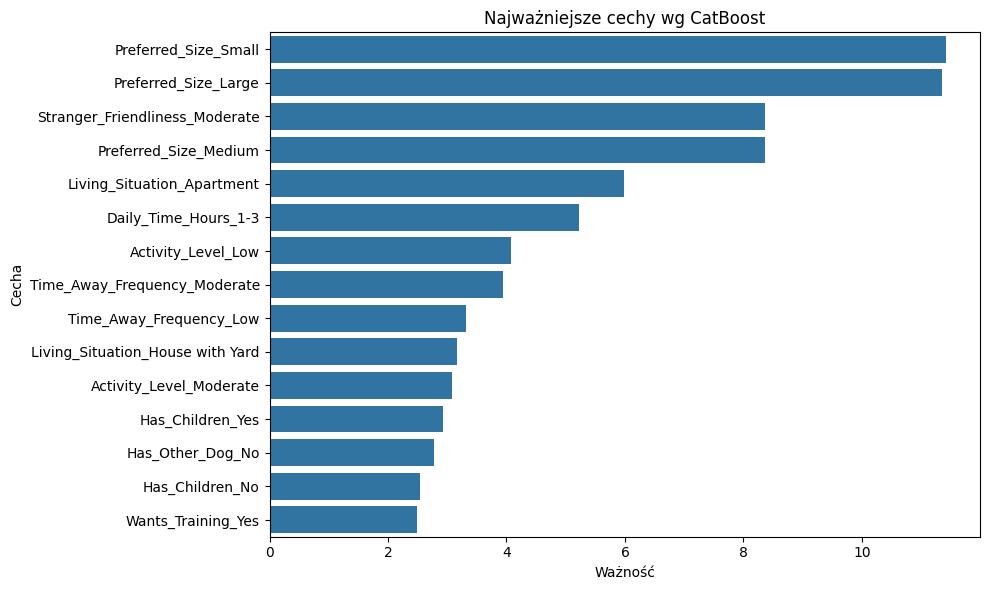

In [ ]:
# Analiza ważności cech
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("survey_wersja_ostateczna.xlsx")
df = df.dropna(subset=['Recommended_Breed'])
y = df['Recommended_Breed']
X = df.drop(columns=['Recommended_Breed'])

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3,
    loss_function='MultiClass',
    verbose=0,
    random_state=42
)
model.fit(X_train, y_train)

# Ważność cech
importances = model.get_feature_importance()
features = X_encoded.columns

feat_imp_df = pd.DataFrame({'Cecha': features, 'Ważność': importances}).sort_values(by='Ważność', ascending=False)

# Wykres
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='Ważność', y='Cecha')
plt.title("Najważniejsze cechy wg CatBoost")
plt.tight_layout()
plt.show()

In [67]:
# uproszczenie - dopasowanie każdej rasy do kolumny dog size i pogrupowanie na 3 klasy : mały, średni, duży
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier

# Wczytaj dane
people = pd.read_excel("survey_wersja_ostateczna.xlsx")
dogs = pd.read_csv("dogs_cleaned_wybrane_cechy_rasy.csv")

# Połącz dane po nazwie rasy
merged = people.merge(dogs[['Breed Name', 'Dog Size']],
                      left_on='Recommended_Breed', right_on='Breed Name', how='left')

# Zmapuj Dog Size do uproszczonych klas
size_map = {
    'Very Small': 'Mały',
    'Small': 'Mały',
    'Medium': 'Średni',
    'Large': 'Duży',
    'Very Large': 'Duży'
}
merged['Group'] = merged['Dog Size'].map(size_map)

# Usuń brakujące
merged = merged.dropna(subset=['Group'])

# Przygotuj dane X, y
y = merged['Group']
X = merged.drop(columns=['Recommended_Breed', 'Dog Size', 'Breed Name', 'Group'])
X = pd.get_dummies(X)

# Zakoduj y
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Podział
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Model
model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3,
    loss_function='MultiClass',
    verbose=100,
    random_state=42
)
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=30)

# Ewaluacja
y_pred = model.predict(X_test)
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


0:	learn: 1.0368855	test: 1.0370643	best: 1.0370643 (0)	total: 2.74ms	remaining: 819ms
100:	learn: 0.2473692	test: 0.2990237	best: 0.2990237 (100)	total: 259ms	remaining: 511ms
200:	learn: 0.1950283	test: 0.2911455	best: 0.2908833 (179)	total: 513ms	remaining: 253ms
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.2908833221
bestIteration = 179

Shrink model to first 180 iterations.

Raport klasyfikacji:
              precision    recall  f1-score   support

        Duży       0.89      0.98      0.94       172
        Mały       0.89      0.80      0.85        51
      Średni       0.81      0.68      0.74        76

    accuracy                           0.88       299
   macro avg       0.87      0.82      0.84       299
weighted avg       0.87      0.88      0.87       299

